<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [806]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [754]:
#ваш код здесь
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [755]:
#ваш код здесь
data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [756]:
#ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [757]:
#ваш код здесь
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [758]:
#ваш код здесь
def extract_education_level(text):
    words = text.split()
    # Предполагаем, что уровень образования указан в первых двух словах
    education_level = ' '.join(words[:2])
    
    # Определение категорий образования
    if 'Высшее образование' in education_level:
        return 'высшее'
    elif 'Неоконченное высшее' in education_level:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in education_level:
        return 'среднее специальное'
    elif 'Среднее образование' in education_level:
        return 'среднее'
    else:
        return 'неизвестно'

# Применение функции к DataFrame
data['Образование'] = data['Образование и ВУЗ'].apply(extract_education_level)

# Удаление старого признака
data.drop('Образование и ВУЗ', axis=1, inplace=True)

In [759]:
data[data['Образование'] == 'среднее']['Образование'].count()

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [760]:
#ваш код здесь
def split_gender_age(text):
    parts = text.split(' , ')
    gender = parts[0]
    age = parts[1]

    # Преобразование пола
    if gender == 'Мужчина':
        gender = 'М'
    elif gender == 'Женщина':
        gender = 'Ж'

    # Преобразование возраста
    age = int(age.split()[0])

    return gender, age

# Применение функции и создание новых столбцов
data['Пол'], data['Возраст'] = zip(*data['Пол, возраст'].apply(split_gender_age))

# Удаление старого признака
data.drop('Пол, возраст', axis=1, inplace=True)

In [761]:
# Расчет процентной доли женских резюме
percentage_female = (data[data['Пол'] == 'Ж'].shape[0] / data.shape[0]) * 100
print(f"Процент женских резюме в данных: {round(percentage_female, 2)}%")


Процент женских резюме в данных: 19.07%


In [762]:
# Cредний возраст соискателей
mean_age = data['Возраст'].mean()
print(f"Cредний возраст соискателей: {round(mean_age, 1)}")

Cредний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [763]:
#ваш код здесь
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate(arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)

# Применение функции к DataFrame
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)

# Удаление старого столбца
data.drop('Опыт работы', axis=1, inplace=True)

In [764]:
# Вычисление медианы для столбца "Опыт работы (месяц)"
median_experience = data['Опыт работы (месяц)'].median()

print(f"Медианный опыт работы: {median_experience} месяцев")

Медианный опыт работы: 100.0 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [765]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 
'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения данных
def split_city_relocation_business_trips(text):
    parts = text.split(' , ')
    city = parts[0].split()[0]  # Взять только первое слово для города

    # Определение категории города
    if city in ['Москва', 'Санкт-Петербург']:
        city_category = city
    elif city in million_cities:
        city_category = 'город-миллионник'
    else:
        city_category = 'другие'

    # Определение готовности к переезду
    relocation_parts = parts[-2]
    if ('перее' in relocation_parts):
        if ('не готова к переезду' in relocation_parts) or('не готов к переезду' in relocation_parts):
            relocation = False
        else: 
            
            relocation = True
    else:
        relocation = False
    # Определение готовности к командировкам
    trips_parts = parts[-1]
    # Определение готовности к переезду
    if ('командировка' in trips_parts):
        if ('не готов к командировкам' in trips_parts) or('не готова к командировкам' in trips_parts):
            trips = False
        else: 
            
            trips = True
    else:
        trips = False
    
    
    return city_category, relocation, trips

# Применение функции и создание новых столбцов
data['Город'], data['Готовность к переезду'], data['Готовность к командировкам'] = zip(*data['Город, переезд, командировки'].apply(
    split_city_relocation_business_trips))

# Удаление старого столбца
data.drop('Город, переезд, командировки', axis=1, inplace=True)

In [766]:
# Расчет процентной доли соискателей из Санкт-Петербурга
percentage_spb = (data[data['Город'] == 'Санкт-Петербург'].shape[0] / data.shape[0]) * 100
print(f"Процент соискателей из Санкт-Петербурга: {round(percentage_spb)}%")

Процент соискателей из Санкт-Петербурга: 11%


In [767]:
# Расчет процентной доли соискателей, готовых к переездам и командировкам
percentage_ready_for_both = (data[(data['Готовность к переезду'] == True) & (data['Готовность к командировкам'] == 
                                                                             True)].shape[0] / data.shape[0]) * 100
print(f"Процент соискателей, готовых и к переездам, и к командировкам: {round(percentage_ready_for_both)}%")

Процент соискателей, готовых и к переездам, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [768]:
#ваш код здесь
categories_employment = ["полная занятость", "частичная занятость", "проектная работа", "волонтерство", "стажировка"]
categories_schedule = ["полный день", "сменный график", "гибкий график", "удалённая работа", "вахтовый метод"]

# Преобразование в One Hot Encoding
for category in categories_employment:
    data[category] = data['Занятость'].apply(lambda x: category in x)

for category in categories_schedule:
    data[category] = data['График'].apply(lambda x: category in x)

# Удаление исходных столбцов
data.drop(['Занятость', 'График'], axis=1, inplace=True)

In [769]:
# Подсчет количества людей, ищущих и проектную работу, и волонтёрство
num_project_volunteer = data[(data['проектная работа'] == True) & (data['волонтерство'] == True)].shape[0]

print(f"Количество людей, ищущих проектную работу и волонтёрство: {num_project_volunteer}")

Количество людей, ищущих проектную работу и волонтёрство: 436


In [770]:
# Подсчет количества людей, желающих работать вахтовым методом и с гибким графиком
num_rotational_flexible = data[(data['вахтовый метод'] == True) & (data['гибкий график'] == True)].shape[0]

print(f"Количество людей, желающих работать вахтовым методом и с гибким графиком: {num_rotational_flexible}")

Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [771]:
#ваш код здесь
exchange_rates = pd.read_csv('ExchangeRates.csv')
# Преобразование столбца с датой в формат datetime и извлечение только даты
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], format='%d/%m/%y').dt.date

# Преобразование столбца "Обновление резюме"
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], format="%d.%m.%Y %H:%M").dt.date

# Функция для извлечения суммы ЗП и валюты
def extract_salary_currency(salary_str):
    # Разделение строки на сумму и валюту
    parts = salary_str.split(' ')
    amount = float(parts[0])  # Удаление пробелов в сумме
    currency = parts[1]

    # Соответствие наименований валют их ISO-кодам
    currency_map = {
        'грн.': 'UAH',
        'USD': 'USD',
        'EUR': 'EUR',
        'бел.руб.': 'BYN',
        'KGS': 'KGS',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KZT': 'KZT',
        'руб.': 'RUB',  # Добавление рубля, если он указан в исходных данных
    }

    iso_currency = currency_map.get(currency, 'RUB')  # На всякий случай оставляем исходное обозначение, если оно не найдено в словаре

    return amount, iso_currency

# Применение функции к столбцу "ЗП"
data[['ЗП', 'Валюта']] = data['ЗП'].apply(lambda x: pd.Series(extract_salary_currency(x)))
# Объединение таблиц
merged_df = pd.merge(data, exchange_rates, how='left', left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'])

# Установка курса 1 для рубля
merged_df.loc[merged_df['Валюта'] == 'RUB', 'close'] = 1
merged_df.loc[merged_df['Валюта'] == 'RUB', 'proportion'] = 1
merged_df['close'].fillna(1)
merged_df['proportion'].fillna(1)
# Расчет заработной платы в рублях
merged_df['ЗП (руб)'] = merged_df['ЗП'] * merged_df['close'] / merged_df['proportion']
median_salary_rub = merged_df['ЗП (руб)'].median() 

print("Медианная заработная плата соискателей в рублях:", round(median_salary_rub / 1000))

Медианная заработная плата соискателей в рублях: 59


In [772]:
merged_df = merged_df.drop(['ЗП', 'Валюта', 'currency', 'proportion', 'close', 'per', 'date', 'time', 'vol'], axis=1)

In [773]:
merged_df.describe()

,Возраст,Опыт работы (месяц),ЗП (руб)
count,44744.000000,44574.000000,4.474400e+04
mean,32.196741,114.418944,7.653354e+04
std,7.929800,79.047861,1.359315e+05
min,14.000000,1.000000,1.000000e+00
25%,27.000000,57.000000,3.708220e+04
50%,31.000000,100.000000,5.901900e+04
75%,36.000000,154.000000,9.500000e+04
max,100.000000,1188.000000,2.430488e+07


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

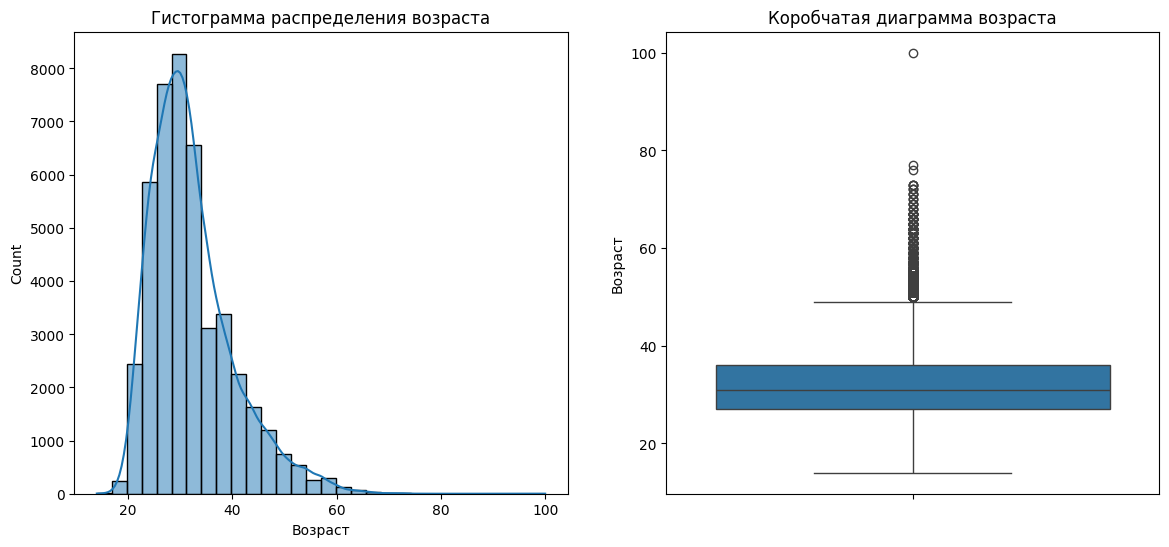

Мода: 30
Минимальный возраст: 14
Максимальный возраст: 100


In [774]:
# ваш код здесь
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(merged_df['Возраст'], kde=True, bins=30)
plt.title('Гистограмма распределения возраста')

# Коробчатая диаграмма (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df['Возраст'])
plt.title('Коробчатая диаграмма возраста')

# Отображение графиков
plt.show()

# Вычисление моды, минимального и максимального значения
mode = merged_df['Возраст'].mode()[0]
min_age = merged_df['Возраст'].min()
max_age = merged_df['Возраст'].max()

print('Мода:', mode)
print('Минимальный возраст:', min_age)
print('Максимальный возраст:', max_age)

**Мода распределения:** Мода возраста соискателей составляет 30 лет. Это означает, что наибольшее количество соискателей в нашем наборе данных имеет возраст 30 лет.

**Предельные значения признака:** Минимальный возраст соискателей в данных составляет 14 лет, а максимальный — 100 лет.

**Интервал возраста большинства соискателей:** Большинство соискателей находится в возрастном диапазоне примерно от 20 до 40 лет, что видно на гистограмме и коробчатой диаграмме.

**Аномалии для признака возраста:** Можно заметить, что в данных присутствуют выбросы по верхней границе, вряд ли человек в возрасте 100 лет будет искать работу

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

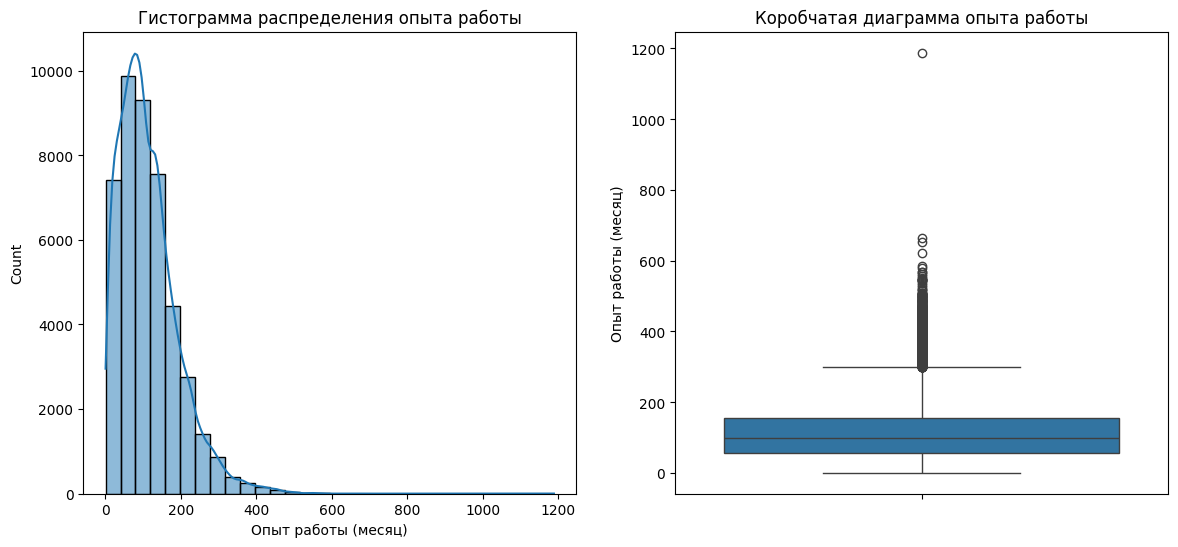

Мода: 81.0
Минимальный опыт работы: 1.0
Максимальный опыт работы: 1188.0


In [775]:
# ваш код здесь
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(merged_df['Опыт работы (месяц)'], kde=True, bins=30)
plt.title('Гистограмма распределения опыта работы')

# Коробчатая диаграмма (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df['Опыт работы (месяц)'])
plt.title('Коробчатая диаграмма опыта работы')

# Отображение графиков
plt.show()

# Вычисление моды, минимального и максимального значения
mode = merged_df['Опыт работы (месяц)'].mode()[0]
min_exp = merged_df['Опыт работы (месяц)'].min()
max_exp = merged_df['Опыт работы (месяц)'].max()

print('Мода:', mode)
print('Минимальный опыт работы:', min_exp)
print('Максимальный опыт работы:', max_exp)

**Мода распределения:** Мода опыта работы соискателей составляет 81 месяц (6 лет и 9 месяцев). 

**Предельные значения признака:** Минимальный опыт работы соискателей в данных составляет 1 месяц, а максимальный — 1188 месяцев (99 лет).

**Интервал возраста большинства соискателей:** Большинство соискателей имеет опыт работы диапазоне примерно от 0 до 200 месяцев, что видно на гистограмме и коробчатой диаграмме.

**Аномалии для признака возраста:** Можно заметить, что в данных присутствуют выбросы по верхней границе, невозможно проработать 99 лет

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


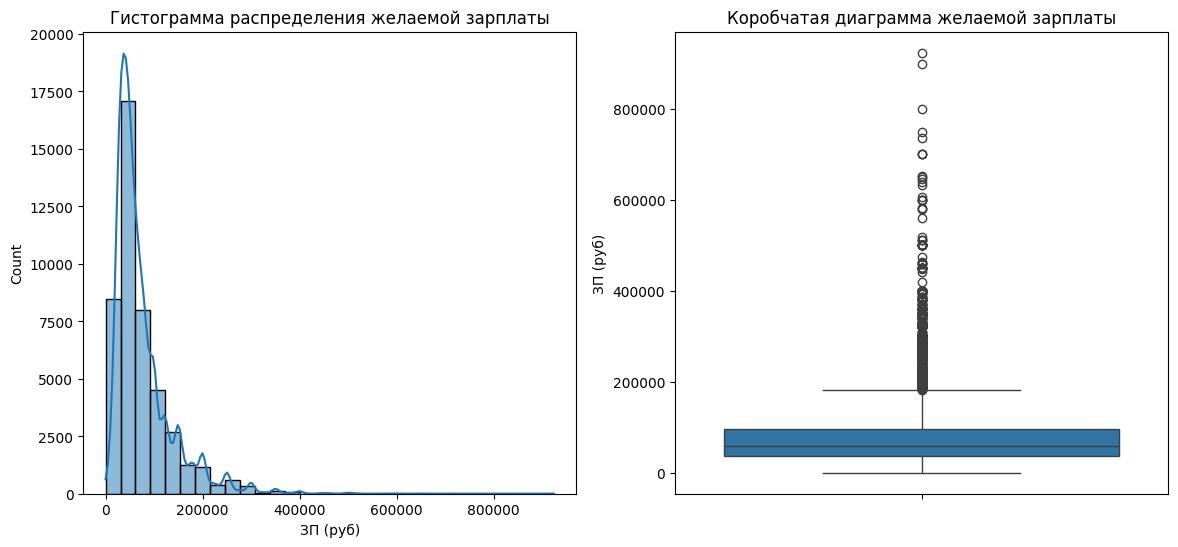

Мода: 50000.0
Минимальная зарплата: 1.0
Максимальная зарплата: 24304876.0


In [776]:
# ваш код здесь 
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(merged_df[merged_df['ЗП (руб)'] < 1000000]['ЗП (руб)'], kde=True, bins=30)
plt.title('Гистограмма распределения желаемой зарплаты')

# Коробчатая диаграмма (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df[merged_df['ЗП (руб)'] < 1000000]['ЗП (руб)'])
plt.title('Коробчатая диаграмма желаемой зарплаты')

# Отображение графиков
plt.show()

# Вычисление моды, минимального и максимального значения
mode = merged_df['ЗП (руб)'].mode()[0]
min_money = merged_df['ЗП (руб)'].min()
max_money = merged_df['ЗП (руб)'].max()

print('Мода:', mode)
print('Минимальная зарплата:', min_money)
print('Максимальная зарплата:', max_money)

**Мода распределения:** Мода желаемой зарплаты соискателей составляет 50 000 рублей. 

**Предельные значения признака:** Минимальная зарплата соискателей в данных составляет 1 руюль, а максимальный — 24 304 876 рублей.

**Интервал возраста большинства соискателей:** Большинство соискателей хочет зарплату диапазоне примерно от 0 до 200 000 рублей, что видно на гистограмме и коробчатой диаграмме.

**Аномалии для признака возраста:** Можно заметить, что в данных присутствуют выбросы и на нижней (суммы вроде 1 рубля), и на верхней границах (гигантские суммы)

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

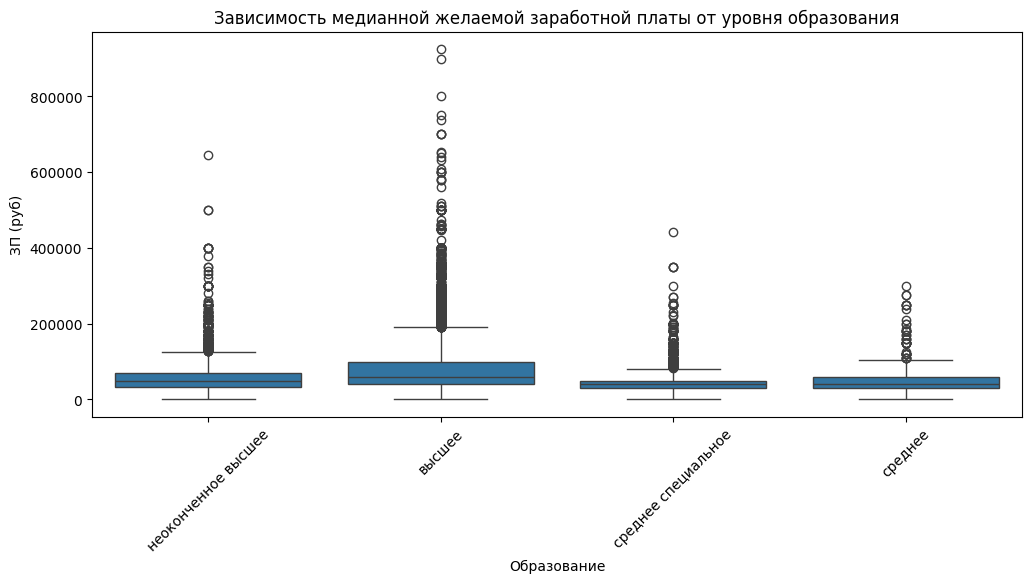

In [777]:
# ваш код здесь
# Отбор данных, где желаемая заработная плата меньше 1 млн рублей
df_filtered = merged_df[merged_df['ЗП (руб)'] < 1000000]

# Построение диаграммы
plt.figure(figsize=(12, 5))
sns.boxplot(x='Образование', y='ЗП (руб)', data=df_filtered)
plt.title('Зависимость медианной желаемой заработной платы от уровня образования')
plt.xticks(rotation=45)
plt.show()

**Медианные значения заработной платы:** Наименьшие медианные значения желаемой заработной платы наблюдаются у соискателей с неоконченным высшим и средним образованием. Соискатели с высшим образованием имеют более высокие медианные ожидания по заработной плате.

**Распределение заработной платы:** Распределение желаемой заработной платы среди соискателей с высшим образованием имеет более широкий размах значений, что указывает на большую вариативность в ожиданиях заработной платы в этой группе. В то время как для других групп размах меньше.

**Выбросы:** На диаграмме видно большое количество выбросов для всех категорий образования, что может указывать на аномально высокие ожидания заработной платы у некоторых соискателей. Эти выбросы могут быть связаны с особыми навыками, опытом или амбициями кандидатов.

**Значимость уровня образования:** Уровень образования является значимым фактором при прогнозировании заработной платы. Как правило, чем выше уровень образования, тем выше медианное значение ожидаемой заработной платы, что подтверждается данной диаграммой.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

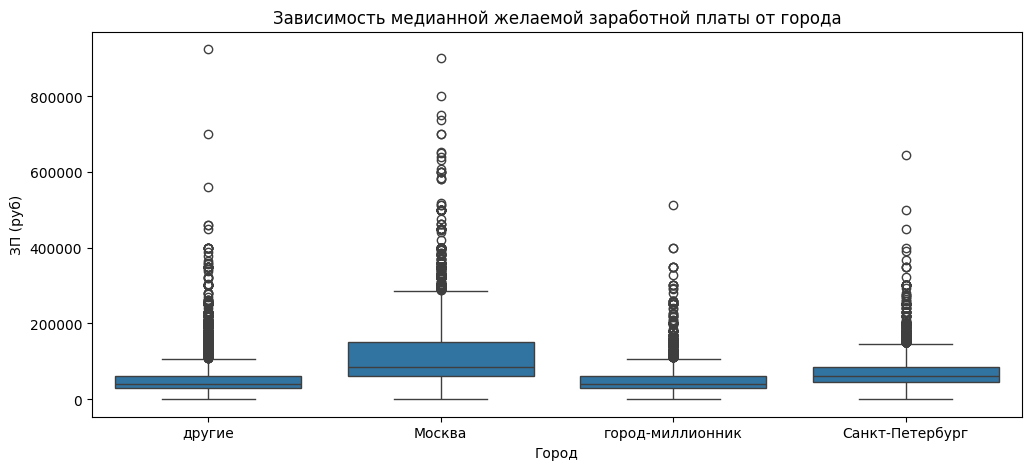

In [778]:
# ваш код здесь
# ваш код здесь
# Отбор данных, где желаемая заработная плата меньше 1 млн рублей
df_filtered = merged_df[merged_df['ЗП (руб)'] < 1000000]

# Построение диаграммы
plt.figure(figsize=(12, 5))
sns.boxplot(x='Город', y='ЗП (руб)', data=df_filtered)
plt.title('Зависимость медианной желаемой заработной платы от города')
plt.show()

Москва демонстрирует самые высокие уровни желаемой заработной платы среди представленных категорий. Это может быть связано с более высокими стоимостью жизни и средними зарплатами в столице по сравнению с другими городами.

Соискатели из городов-миллионников и Санкт-Петербурга имеют схожие медианные ожидания по заработной плате, которые ниже, чем в Москве, но выше, чем в других городах.

Другие города показывают наименьшие ожидания по заработной плате, что может отражать более низкий уровень экономического развития и стоимости жизни в этих регионах по сравнению с крупными городами и столицей.

На диаграмме видны выбросы для всех категорий, особенно много их для Москвы. Это говорит о том, что среди соискателей есть люди с очень высокими ожиданиями относительно заработной платы.

Распределение желаемой заработной платы в Москве имеет более широкий размах и медиану, что указывает на более широкий спектр зарплатных ожиданий в этом городе. Возможно, это связано с большим разнообразием предлагаемых вакансий и более высокой конкуренцией за таланты в столице.

Данные говорят о том, что географическое положение является важным фактором, влияющим на ожидания соискателей касательно уровня заработной платы. Это подчеркивает необходимость учитывать региональные экономические условия при анализе зарплатных ожиданий.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

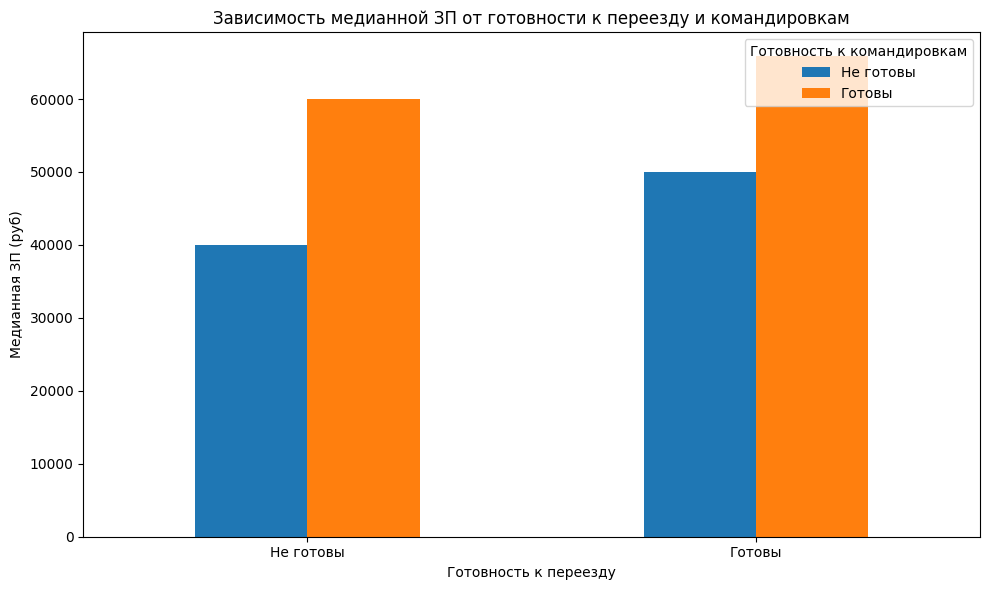

In [779]:
# ваш код здесь
# Группировка данных для расчета медианных значений ЗП
median_salary = merged_df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

# Построение многоуровневой столбчатой диаграммы
median_salary.plot(kind='bar', figsize=(10, 6))

# Настройка внешнего вида графика
plt.title('Зависимость медианной ЗП от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks([0, 1], ['Не готовы', 'Готовы'], rotation=0)
plt.legend(title='Готовность к командировкам', labels=['Не готовы', 'Готовы'])
plt.tight_layout()

# Отображение графика
plt.show()

In [780]:
merged_df[(merged_df['Готовность к переезду'] == True) & (merged_df['Готовность к командировкам'] == True)]['ЗП (руб)'].median()

65849.455

Соискатели, готовые к командировкам, в среднем ожидают более высокую заработную плату вне зависимости от их готовности к переезду.

Медианная заработная плата соискателей, готовых к переезду, выше по сравнению с теми, кто к переезду не готов. Это различие сохраняется и среди тех, кто готов к командировкам, и среди тех, кто не готов.

Наибольшую медианную заработную плату ожидают соискатели, которые готовы и к переезду, и к командировкам. Это может указывать на то, что соискатели, демонстрирующие гибкость в вопросах мобильности, оценивают свои услуги выше, исходя из потенциально более широкого круга возможностей и более высоких требований к их квалификации.

Соискатели, которые не готовы ни к переезду, ни к командировкам, имеют самые низкие медианные ожидания по заработной плате.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

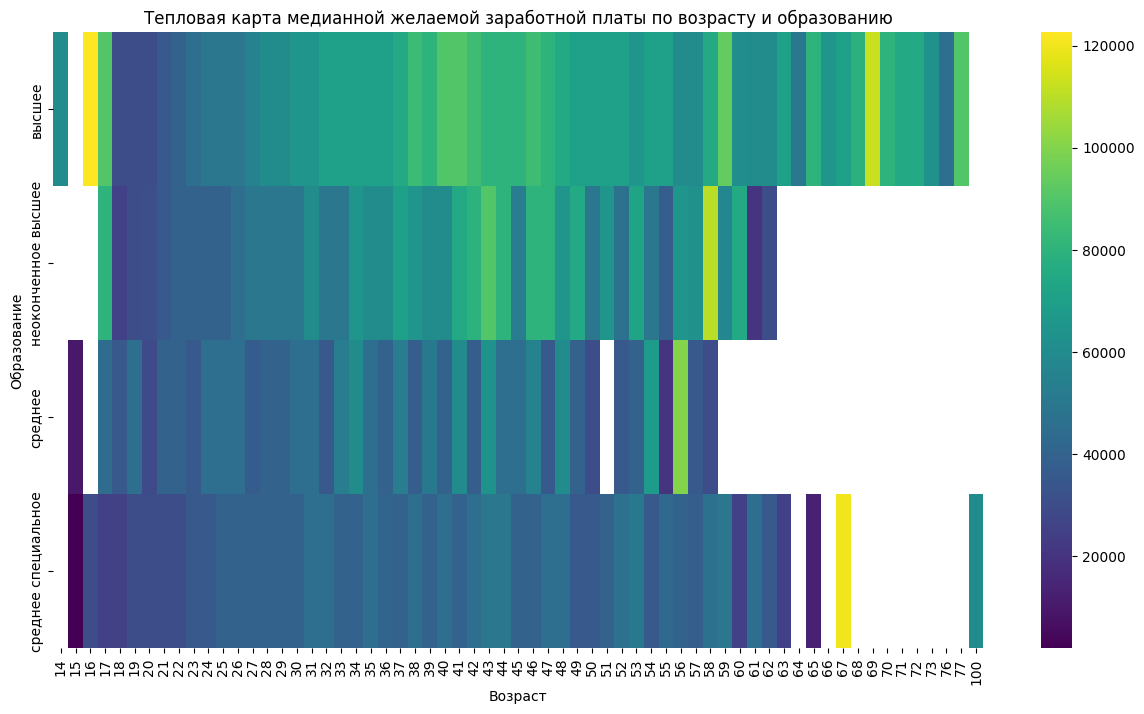

In [705]:
# ваш код здесь
# Создание сводной таблицы
pivot_table = merged_df.pivot_table(
    values='ЗП (руб)', 
    index='Образование', 
    columns='Возраст', 
    aggfunc='median'
)

# Построение тепловой карты
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=False, fmt=".0f")
plt.title('Тепловая карта медианной желаемой заработной платы по возрасту и образованию')
plt.xlabel('Возраст')
plt.ylabel('Образование')
plt.show()

Высшее образование: Соискатели с высшим образованием, особенно в определённых возрастных группах, имеют тенденцию к более высоким медианным заработным платам, что может отражать их более высокую квалификацию и опыт.

Неоконченное высшее и среднее специальное образование: Эти категории показывают более низкие медианные заработные платы по сравнению с категорией "высшее образование", особенно в возрастных группах старше 30 лет.

Среднее образование: Соискатели со средним образованием в большинстве возрастных групп имеют самые низкие ожидания по заработной плате.

Зависимость от возраста: Медианные заработные платы варьируются в разных возрастных группах, с некоторыми пиками и спадами, что может свидетельствовать о карьерном росте или изменениях на рынке труда, которые влияют на ожидания заработной платы в разные периоды жизни.

Аномалии: На тепловой карте присутствуют яркие пятна, которые могут указывать на аномально высокие или низкие медианные заработные платы для определённых комбинаций возраста и образования. Например, очень яркие цвета в более старших возрастных группах могут указывать на наличие высококвалифицированных специалистов с большим опытом работы, ищущих работу с высокой оплатой.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

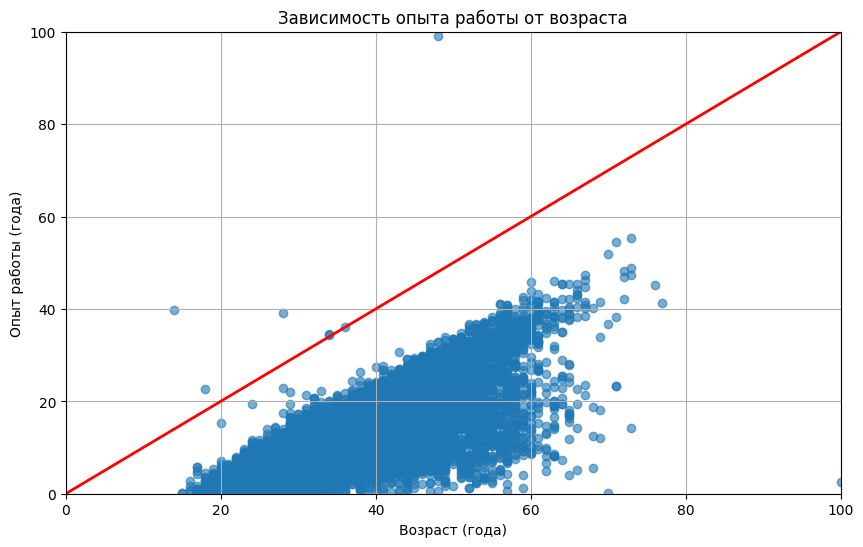

In [706]:
# ваш код здесь
# Перевод опыта работы из месяцев в года
merged_df['Опыт работы (года)'] = merged_df['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Возраст'], merged_df['Опыт работы (года)'], alpha=0.6)

# Построение прямой, проходящей через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color='red', lw=2)

# Настройка графика
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (года)')
plt.ylabel('Опыт работы (года)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)

# Отображение графика
plt.show()

Подавляющее большинство точек сосредоточено под красной линией, что означает, что для большинства соискателей опыт работы меньше их возраста. Это соответствует реальной ситуации, так как люди обычно начинают работать после достижения определённого возраста, часто после окончания учебы.

Точки, расположенные вблизи красной линии, представляют соискателей с большим опытом работы, который приближается к их возрасту. Это могут быть люди, начавшие работать в очень молодом возрасте или те, кто рано начал профессиональную карьеру.

Точки, расположенные на красной линии или выше неё, являются аномальными. Они указывают на ситуации, когда опыт работы равен или превышает возраст соискателей, что нереалистично и может указывать на ошибки в данных.

Особенно заметны несколько точек, расположенных значительно выше красной линии для возрастных категорий 60-100 лет. Эти значения явно аномальные, поскольку предполагают, что у этих соискателей более 100 лет опыта работы, что невозможно.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


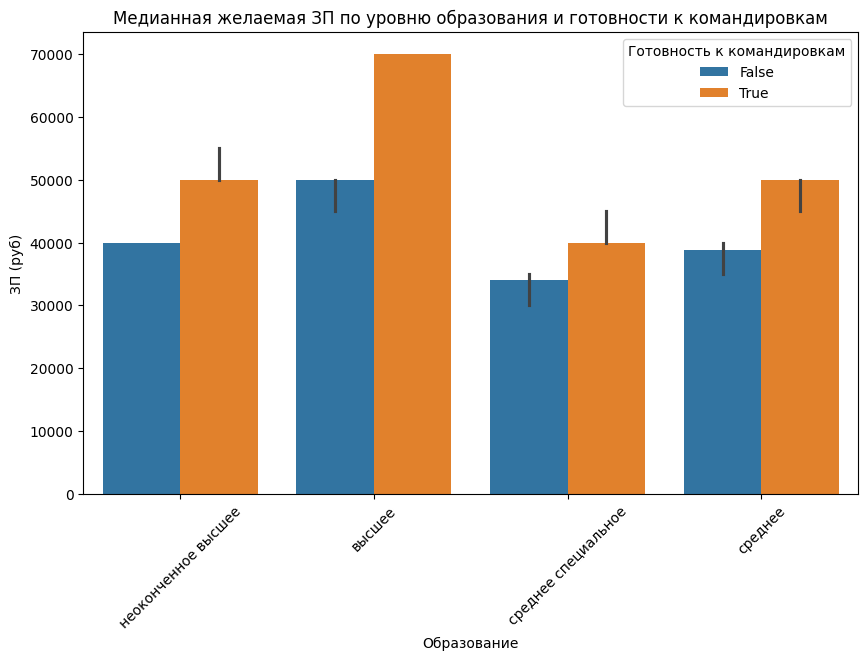

In [818]:
# ваш код здесь
# Перевод опыта работы в года
merged_df['Опыт работы (года)'] = merged_df['Опыт работы (месяц)'] / 12
merged_df_new =  merged_df[merged_df['Опыт работы (года)'] < 80]

# Первый график: Зависимость медианной желаемой ЗП от образования и готовности к командировкам
plt.figure(figsize=(10, 6))
sns.barplot(x='Образование', y='ЗП (руб)', hue='Готовность к командировкам', data=merged_df_new, estimator=np.median)
plt.title('Медианная желаемая ЗП по уровню образования и готовности к командировкам')
plt.xticks(rotation=45)
plt.legend(title='Готовность к командировкам')
plt.show()

Во всех категориях образования соискатели, готовые к командировкам, имеют более высокие медианные ожидания заработной платы по сравнению с теми, кто не готов к командировкам.

Соискатели с высшим образованием в среднем имеют более высокие ожидания заработной платы, независимо от их готовности к командировкам, по сравнению с другими уровнями образования.

Соискатели с неоконченным высшим образованием, готовые к командировкам, ожидают заработную плату, сопоставимую с ожиданиями соискателей с полным высшим образованием, что может указывать на то, что рынок труда ценит практический опыт и готовность к мобильности.

Соискатели со средним и средним специальным образованием имеют схожие медианные ожидания заработной платы, и эти ожидания заметно ниже, чем у категорий с высшим образованием.

Перекрёстные линии погрешности показывают степень изменчивости или разброс данных внутри каждой категории, что может быть индикатором статистической надёжности медианных значений.

<Figure size 1000x600 with 0 Axes>

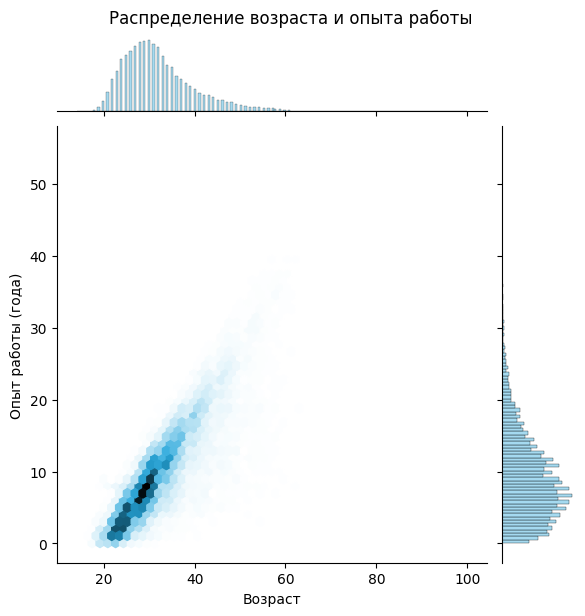

In [819]:
# Второй график: Распределение возраста и опыта работы
plt.figure(figsize=(10, 6))
sns.jointplot(x='Возраст', y='Опыт работы (года)', data=merged_df_new, kind='hex', color='skyblue')
plt.suptitle('Распределение возраста и опыта работы', y=1.02)
plt.show()

Исходя из графика, можно сделать следующие выводы:

Концентрация данных: Самые темные области на графике показывают наиболее часто встречающиеся комбинации возраста и опыта работы. Это указывает на то, что большинство соискателей имеют опыт работы, который увеличивается с возрастом.

Распределение возраста: Гистограмма в верхней части графика показывает распределение возраста соискателей. Похоже, что распределение возраста сконцентрировано в более молодых возрастных группах с постепенным уменьшением числа соискателей в старших возрастных категориях.

Распределение опыта работы: Гистограмма справа показывает распределение опыта работы. Она демонстрирует, что у многих соискателей есть значительный опыт работы, но также существует немало соискателей с относительно небольшим опытом.

Связь между возрастом и опытом работы: График показывает, что с увеличением возраста, как правило, увеличивается и опыт работы. Однако после определенного возраста увеличение опыта работы замедляется, что может быть связано с переходом некоторых соискателей на пенсию или изменением карьерных путей.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [781]:
# ваш код здесь
duplicates_count = merged_df.duplicated().sum()
merged_df = merged_df.drop_duplicates()
duplicates_count

161

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [786]:
# ваш код здесь
merged_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удалённая работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [787]:
# ваш код здесь
merged_df = merged_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
median_experience = merged_df['Опыт работы (месяц)'].median()
merged_df['Опыт работы (месяц)'].fillna(median_experience, inplace=True)

In [789]:
merged_df['Опыт работы (месяц)'].mean()

114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [800]:
# ваш код здесь
new_data = merged_df[(merged_df['ЗП (руб)'] <= 1000000) & (merged_df['ЗП (руб)'] >= 1000)]
merged_df.shape[0] - new_data.shape[0]

89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [802]:
# ваш код здесь
resume_df = new_data[new_data['Опыт работы (месяц)'] / 12 <= new_data['Возраст']]
new_data.shape[0] - resume_df.shape[0]

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

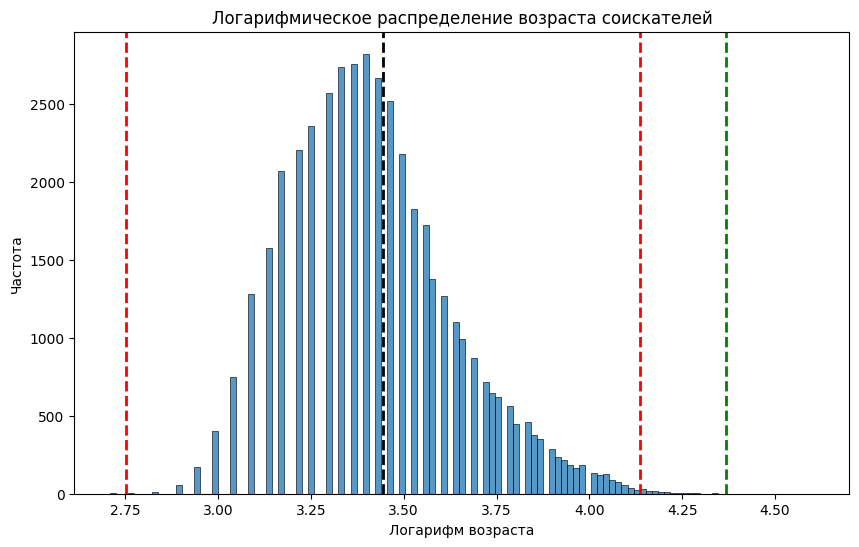

In [809]:
# ваш код здесь
# Логарифмирование возраста
log_age = np.log(resume_df['Возраст'])

# Построение гистограммы с логарифмическим масштабом
plt.figure(figsize=(10, 6))
histplot = sns.histplot(log_age, kde=False)
histplot.axvline(log_age.mean(), color='k', linestyle='--', lw=2)
histplot.axvline(log_age.mean() + 3 * log_age.std(), color='r', linestyle='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='r', linestyle='--', lw=2)

# Расширение интервала среднего на 1 сигму вправо
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='g', linestyle='--', lw=2)

# Настройка графика
plt.title('Логарифмическое распределение возраста соискателей')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.show()

# Определение выбросов с использованием z-отклонения
z_scores = zscore(log_age)
outliers = resume_df[(z_scores < -3) | (z_scores > 4)]

In [811]:
outliers.shape[0]

3

Распределение смещено влево от среднего значения, что указывает на асимметрию вправо в исходных данных возраста соискателей. Это означает, что в данных присутствует больше молодых соискателей по сравнению с более старшими.

Большинство значений сосредоточено вокруг среднего, что является ожидаемым для нормально распределённых данных.

Точки за пределами зелёной пунктирной линии могут рассматриваться как потенциальные выбросы. Это могут быть соискатели с очень высоким возрастом, что не соответствует общей тенденции и может указывать на ошибки в данных или на резюме, которые не следует учитывать при анализе данных.

Послабление до четырёх сигм в правую сторону позволяет учесть более широкий диапазон возрастов, но, тем не менее, значения за пределами этой границы могут считаться выбросами.